In [42]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Q1

In [3]:
df = pd.read_csv('../data/10/city_lifestyle_dataset.csv')

df.head()

,city_name,country,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,Old Vista,Europe,2775,3850,86.4,1310,43,52.0,8.5,23.8
1,Beachport,Europe,3861,3700,78.1,1330,42,62.8,8.1,33.1
2,Valleyborough,Europe,2562,4310,80.1,1330,39,73.2,8.5,40.2
3,City,Europe,3192,3970,81.2,1480,60,49.2,8.5,43.6
4,Falls,Europe,3496,4320,100.0,1510,64,93.7,8.5,42.5


In [5]:
df.drop(['city_name', 'country'], axis=1, inplace=True)

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [18]:
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

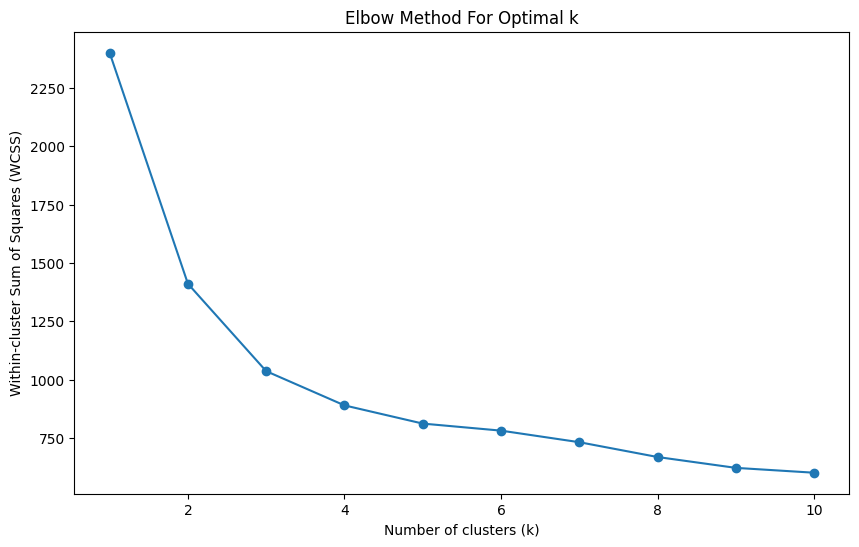

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

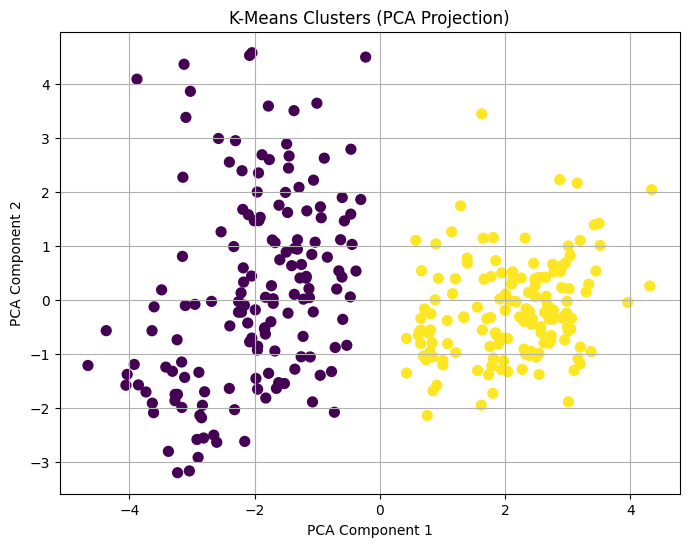

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], s=50)

plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [15]:
silhouette_score(X_scaled, kmeans.labels_)

np.float64(0.3555358300857737)

# Q2

In [27]:
df = pd.read_excel('../data/10/Online Retail.xlsx')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [23]:
df.shape

(541909, 8)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [29]:
df = df.dropna(subset=['CustomerID'])

In [30]:
df = df[df['Quantity'] > 0]
df['Total Price'] = df['Quantity'] * df['UnitPrice']

In [31]:
# RFM Analysis

# Recency
max_date = df['InvoiceDate'].max()
recency = df.groupby('CustomerID')['InvoiceDate'].max().apply(lambda x : (max_date - x).days)

# Frequency
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Monetary
monetary = df.groupby('CustomerID')['Total Price'].sum()

In [33]:
avg_quantity = df.groupby("CustomerID")["Quantity"].mean()
avg_unit_price = df.groupby("CustomerID")["UnitPrice"].mean()
unique_products = df.groupby("CustomerID")["StockCode"].nunique()

In [34]:
X = pd.DataFrame({
    "Recency": recency,
    "Frequency": frequency,
    "Monetary": monetary,
    "AvgQuantity": avg_quantity,
    "AvgUnitPrice": avg_unit_price,
    "UniqueProducts": unique_products
})

In [37]:
scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X['PCA1'] = X_pca[:, 0]
X['PCA2'] = X_pca[:, 1]

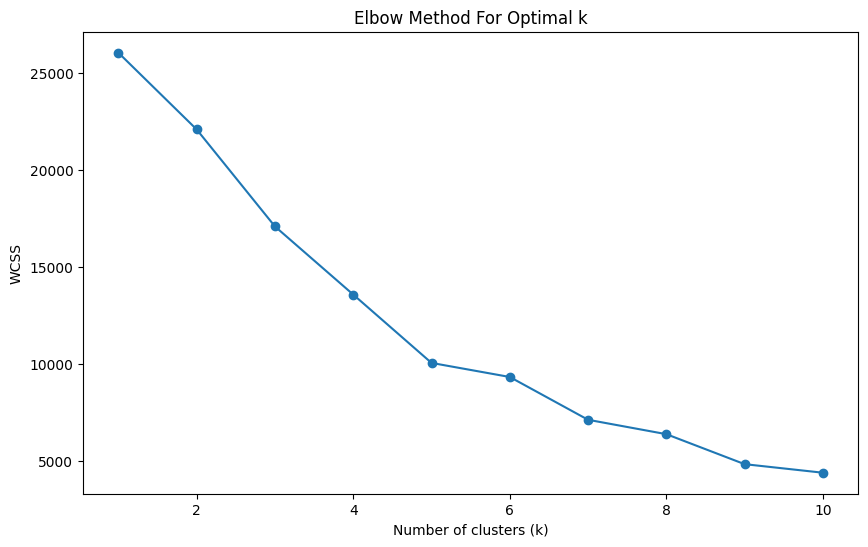

In [38]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, init='k-means++')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

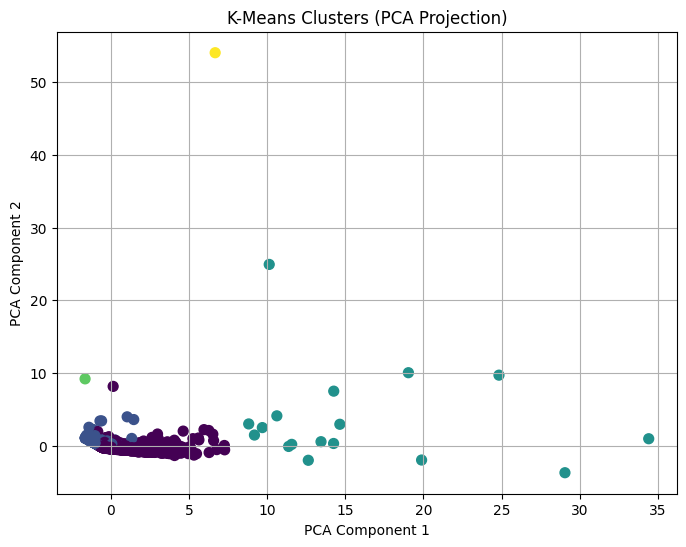

In [39]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
X['Cluster'] = kmeans.labels_

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=X['Cluster'], s=50)
plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [41]:
silhouette_score(X_scaled, kmeans.labels_)

np.float64(0.46607608114983606)

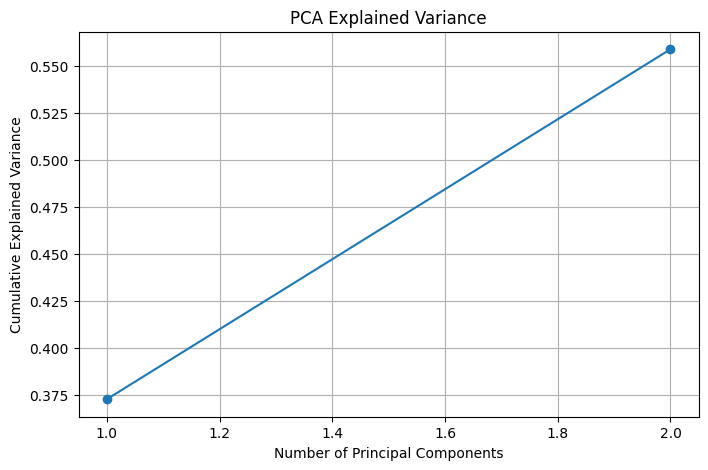

PC1: 0.37
PC2: 0.19


In [43]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# Print explained variance
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.2f}")